In [1]:
import pickle
from ZX_dualities import *
from XY_dualities import *
from automorphisms import *
from utils.qec import *
from utils.qiskit import *

In [2]:
n = 5
k = 1
d = 3
stabs = ['XZZXI','IXZZX','XIXZZ','ZXIXZ']
H_symp = stabs_to_H_symp(stabs)
G,LX,LZ,D = compute_standard_form(H_symp)
print(binary_vecs_to_paulis(LX))

[['Z', 'I', 'I', 'Z', 'X']]


## SH circuit

In [3]:
filename = f'./auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)

In [4]:
auts = code_auts_dict['auts']
aut = auts[3]
phys_act = circ_from_aut(H_symp,aut)        
phys_circ, _ = phys_act.circ()
act = logical_circ_and_pauli_correct(H_symp,phys_circ)
circ = act.run()

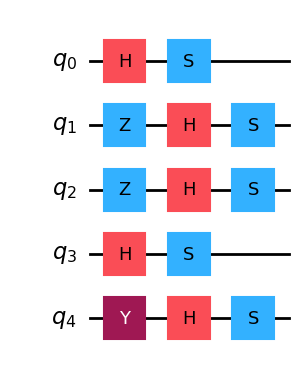

In [5]:
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## H circuit

In [6]:
filename = f'./ZX_dualities_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)

In [7]:
auts = code_auts_dict['auts']
aut = auts[1]
phys_act = circ_from_ZX_duality(H_symp,aut)        
phys_circ, _ = phys_act.circ()
act = logical_circ_and_pauli_correct(H_symp,phys_circ)
circ = act.run()

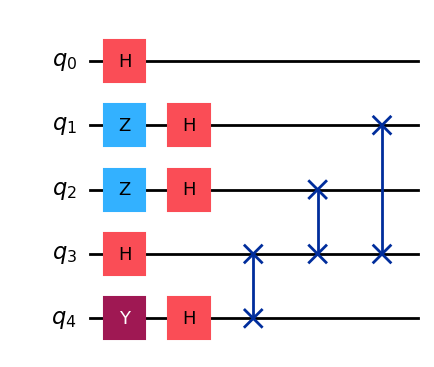

In [8]:
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## S circuit

In [9]:
filename = f'./XY_dualities_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)

In [10]:
auts = code_auts_dict['auts']
aut = auts[1]
phys_act = circ_from_XY_duality(H_symp,aut)        
phys_circ, _ = phys_act.circ()
act = logical_circ_and_pauli_correct(H_symp,phys_circ)
new_tableux = act.new_tableux()
print(new_tableux[0])
pauli_prod_phases= act.new_tableux_pauli_prod_phases()
print(act.new_tableux_anticomm()[2])
print(pauli_prod_phases)
circ = act.run()

[0 2 2 0 1 0]
[[0 0 1 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1]]
[0 2 2 0 0 0]


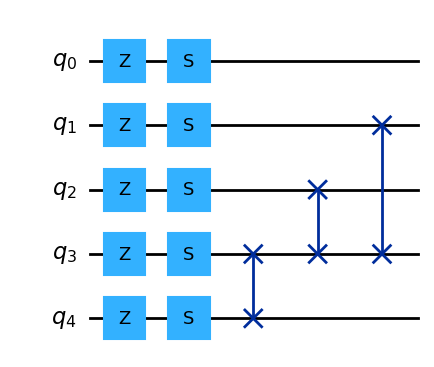

In [11]:
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')